In [46]:
#Importación desde Kaggle
from google.colab import files
!pip install -q kaggle

In [47]:
#Json para la comunicación con cliente

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [48]:
#Descarga del dataset
!kaggle datasets download -d csafrit2/steel-industry-energy-consumption

Dataset URL: https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption
License(s): other
steel-industry-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Descarga del archivo
!unzip steel-industry-energy-consumption.zip

In [335]:
#Lectura del archivo como pandas
import pandas as pd
data = pd.read_csv('Steel_industry_data.csv')

In [336]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Attribute Information:

Date Continuous-time data taken on the first of the month

Usage_kWh Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

CO2 Continuous ppm

NSM Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday : Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load

In [337]:
#Challenge
#Which times of the year is the most energy consumed?
#What patterns can we identify in energy usage?

In [338]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')


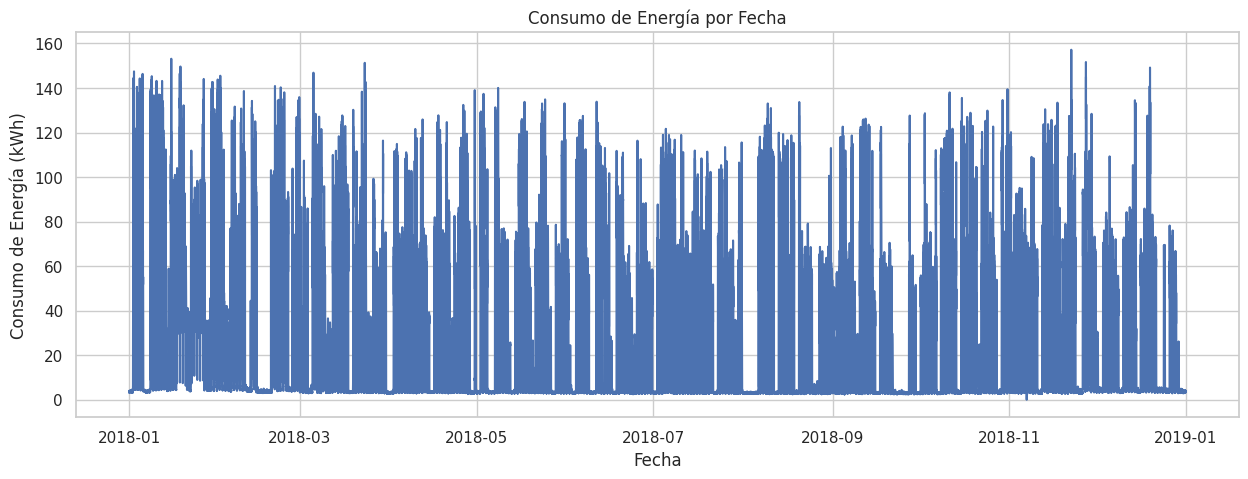

In [339]:

import matplotlib.pyplot as plt

# Agrupar los datos por fecha y sumar el consumo de energía
energy_by_date = data.groupby('date')['Usage_kWh'].sum()

# Crear la gráfica
plt.figure(figsize=(15, 5))
plt.plot(energy_by_date.index, energy_by_date.values)
plt.xlabel('Fecha')
plt.ylabel('Consumo de Energía (kWh)')
plt.title('Consumo de Energía por Fecha')
plt.grid(True)
plt.show()

In [340]:
data['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [341]:
data.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000
std,NaN,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317


In [342]:
#Asignamos valor numérico a WeekStatus, weekday será 1 y weekend 0
data['WeekStatus'] = data['WeekStatus'].map({'Weekday': 0, 'Weekend': 1})
print(data.head())


                 date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   
2 2018-01-01 00:45:00       3.24                                  3.28   
3 2018-01-01 01:00:00       3.31                                  3.56   
4 2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                

In [343]:
data['WeekStatus'].unique()

array([0, 1])

In [344]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,Monday,Light_Load


In [345]:
#Ya que vemos unas primeras filas con valores nulos valuamos cuanto impacto tienen en la fila de Leading Current (Corriente adelantada a Tensión)
data['Leading_Current_Reactive_Power_kVarh'].value_counts(0)

,count
Leading_Current_Reactive_Power_kVarh,
0.00,23610
0.04,397
0.07,199
0.11,190
0.14,167
...,...
27.61,1
8.78,1
23.29,1


Comenzamos con la exploración de los datos.

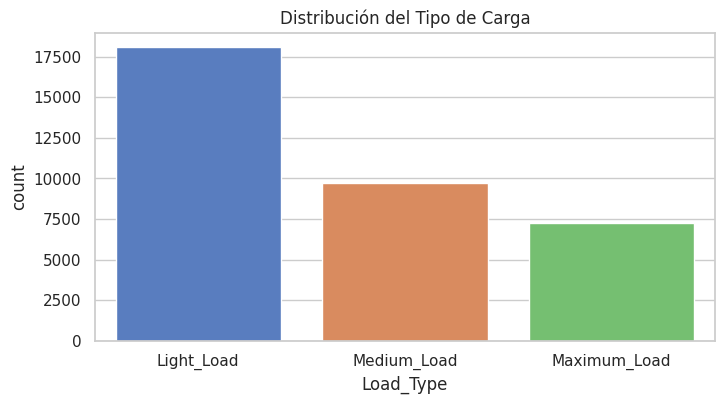

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Gráfico de barras para 'Load_Type'
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Load_Type', palette='muted')
plt.title('Distribución del Tipo de Carga')
plt.show()



Como se puede observar aproximadamente la mitad de los registros son de carga ligera mientras que los registo de máxima carga se dan aproximadamente en 1 de cada 5, veamos si hay alguna relación con el día de la semana

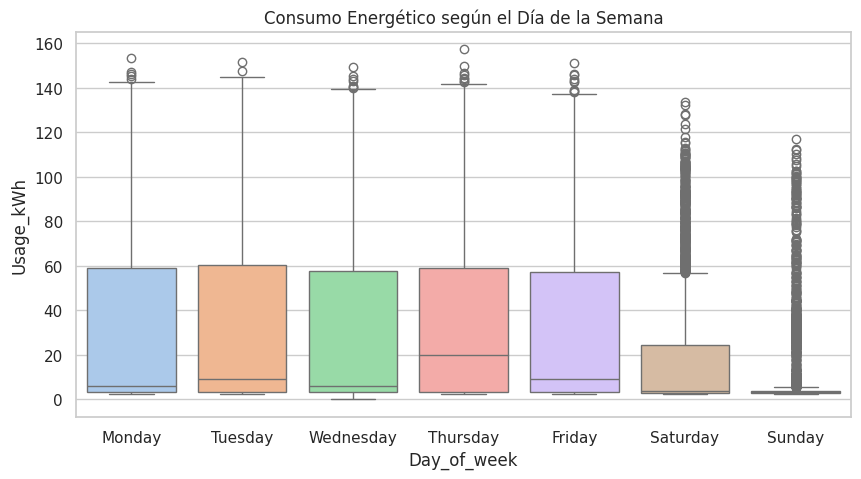

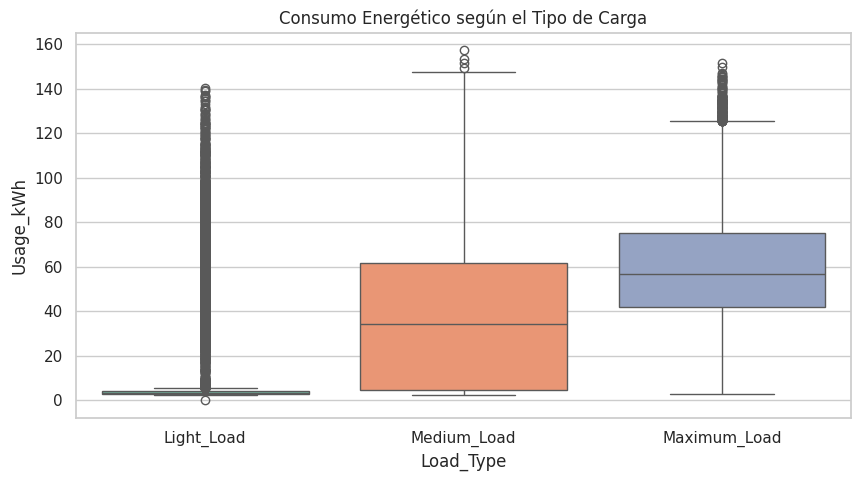

In [347]:
# Boxplot para 'Day_of_week' vs 'Usage_kWh'
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Day_of_week', y='Usage_kWh', palette='pastel')
plt.title('Consumo Energético según el Día de la Semana')
plt.show()

# Boxplot para 'Load_Type' vs 'Usage_kWh'
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Load_Type', y='Usage_kWh', palette='Set2')
plt.title('Consumo Energético según el Tipo de Carga')
plt.show()


Como era de esperar los datos de mayor consumo corresponden con los de mayor pesadez de la carga. Se observa que los regímenes de trabajo son similares todos los días de la semana, con excepción del jueves donde se produce un aumento de la mediana de consumo, quizás sea debido a un proceso industrial característico, como fabricación de Acero Especial que requiera un proceso específico.
Los fines de semana muestran un régimen más sosegado de producción, diría que los domingos se trabaja únicamente de forma eventual bajo las necesidades productivas, y los sábados probablemente con algún turno libre. Veamos la influencia del mes del año.

In [348]:
data['month'] = data['date'].dt.month

In [349]:
data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

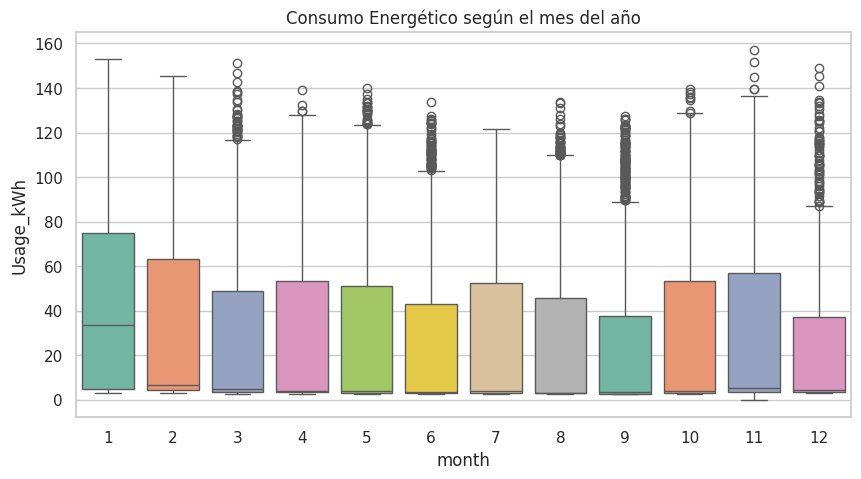

In [350]:
# Boxplot para representar consumos por mes
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='month', y='Usage_kWh', palette='Set2')
plt.title('Consumo Energético según el mes del año')
plt.show()

Enero es el Mes de Mayor consumo, con una mediana muy superior a la normal, por tanto con un mayor consumo con respecto al resto, muy característico.

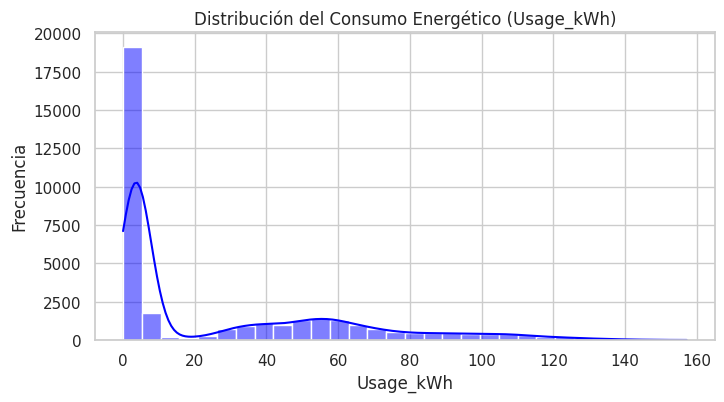

In [351]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Usage_kWh'], bins=30, kde=True, color='blue')
plt.title('Distribución del Consumo Energético (Usage_kWh)')
plt.xlabel('Usage_kWh')
plt.ylabel('Frecuencia')
plt.show()


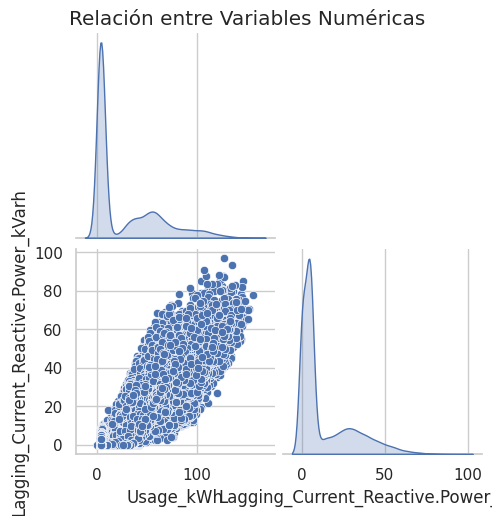

In [352]:
# Gráfico de pares, vamos a ver como se relacionan algunas de las variables
sns.pairplot(data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh'
            ]],
             diag_kind='kde', corner=True)
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.xlabel('Usage_kWh', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.show()


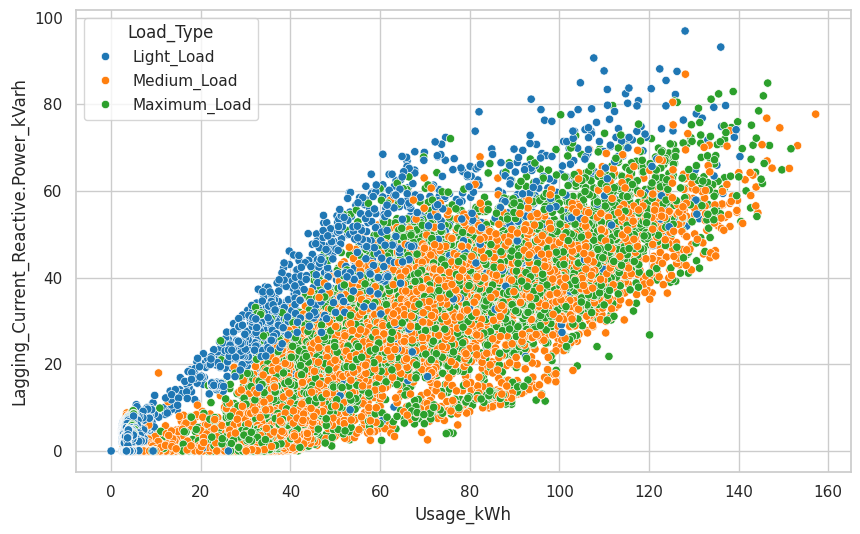

In [353]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Usage_kWh', y='Lagging_Current_Reactive.Power_kVarh', hue="Load_Type",palette="tab10");

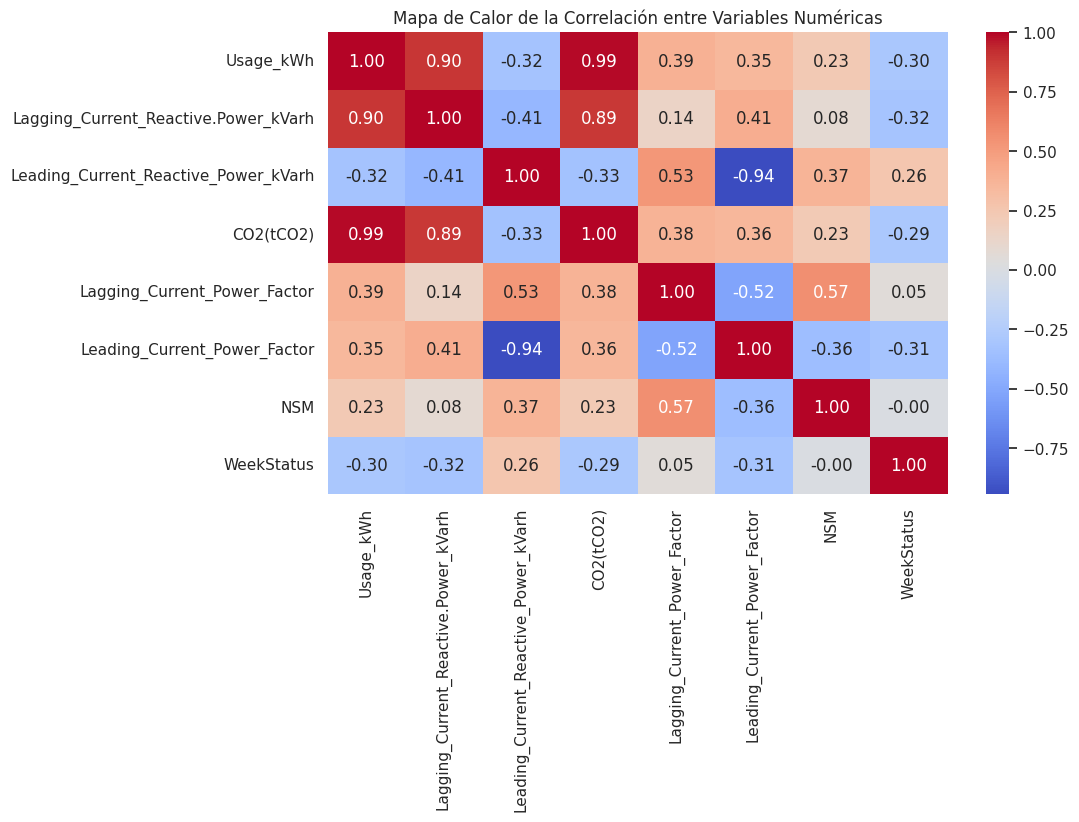

In [354]:
# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


Como se puede ver el CO2 tiene gran correlación con los kWh, por lo que se deduce que son directamente proporcionales. Habrá que tener esto en cuenta ya que puede influir en determinados modelos de ML. También destaca la correlación con Lagging Current Reactive Power

# Preprocesamiento


In [355]:
#Identificamos clase 0, 1 y 2 para las categorías de Load_Type
#Asignamos valor numérico a Load Type ( 0, 1 o 2)
data['Load_Type'] = data['Load_Type'].map({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2})
print(data.head())

                 date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   
2 2018-01-01 00:45:00       3.24                                  3.28   
3 2018-01-01 01:00:00       3.31                                  3.56   
4 2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                

In [356]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Monday,0,1
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Monday,0,1
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Monday,0,1
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,Monday,0,1
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,Monday,0,1


In [357]:
data.drop('date', axis=1, inplace=True)

In [358]:
#Mismo proceso con day of the week

data['Day_of_week'] = data['Day_of_week'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday' : 6})
print(data.head())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [359]:
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,0,1
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,0,1
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,0,1
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,0,1
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,0,1


In [360]:
data['Day_of_week'].unique()

array([0, 1, 2, 3, 4, 5, 6])

Procedemos a normalizar datos y a entrenar modelos de clustering para identificar distintas características del consumo energético.

In [361]:

# Contar la cantidad de valores NaN en cada columna
nan_counts = data.isnull().sum()

# Mostrar las columnas con valores NaN y su cantidad
print("Conteo de valores NaN en cada columna:")
print(nan_counts[nan_counts > 0])

Conteo de valores NaN en cada columna:
Series([], dtype: int64)


In [362]:
# Split the dataset and prepare some lists to store the models
from sklearn.model_selection import train_test_split
X = data.drop(['Load_Type'], axis=1)
y = data['Load_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [363]:
#Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


In [364]:
# Lista de modelos a entrenar
models = [
    XGBClassifier(),
    CalibratedClassifierCV(),
    BaggingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

# Nombres de los modelos
names = [
    "XGBClassifier",
    "CalibratedClassifierCV",
    "BaggingClassifier",
    "LogisticRegression",
    "SVC",
    "KNeighborsClassifier",
    "GaussianNB",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier"
]


In [365]:
# Diccionario para almacenar los resultados
results = []

# Automatizar el entrenamiento y evaluación
for name, model in zip(names, models):
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Almacenar los resultados en una lista
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convertir los resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results)
print("\nResultados:")
print(results_df.sort_values(by='Accuracy', ascending=False))


Entrenando XGBClassifier...
Entrenando CalibratedClassifierCV...
Entrenando BaggingClassifier...
Entrenando LogisticRegression...
Entrenando SVC...
Entrenando KNeighborsClassifier...
Entrenando GaussianNB...
Entrenando DecisionTreeClassifier...
Entrenando RandomForestClassifier...
Entrenando AdaBoostClassifier...

Resultados:
                    Model  Accuracy  Precision    Recall  F1 Score
0           XGBClassifier  0.988014   0.988031  0.988014  0.988017
8  RandomForestClassifier  0.984361   0.984354  0.984361  0.984353
7  DecisionTreeClassifier  0.983676   0.983684  0.983676  0.983675
2       BaggingClassifier  0.982991   0.983006  0.982991  0.982991
9      AdaBoostClassifier  0.911986   0.914067  0.911986  0.911496
5    KNeighborsClassifier  0.900457   0.900761  0.900457  0.900582
4                     SVC  0.730594   0.759821  0.730594  0.740355
1  CalibratedClassifierCV  0.727511   0.718131  0.727511  0.721646
3      LogisticRegression  0.695434   0.692635  0.695434  0.693970
6 

Sin necesidad de ajuste de hiperparámetros, varios modelos obtienen resultados del 98% de acierto.